In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

### Step 1
Use the data from data/subset_homework folder and visualize some examples. How many images are there for each class?

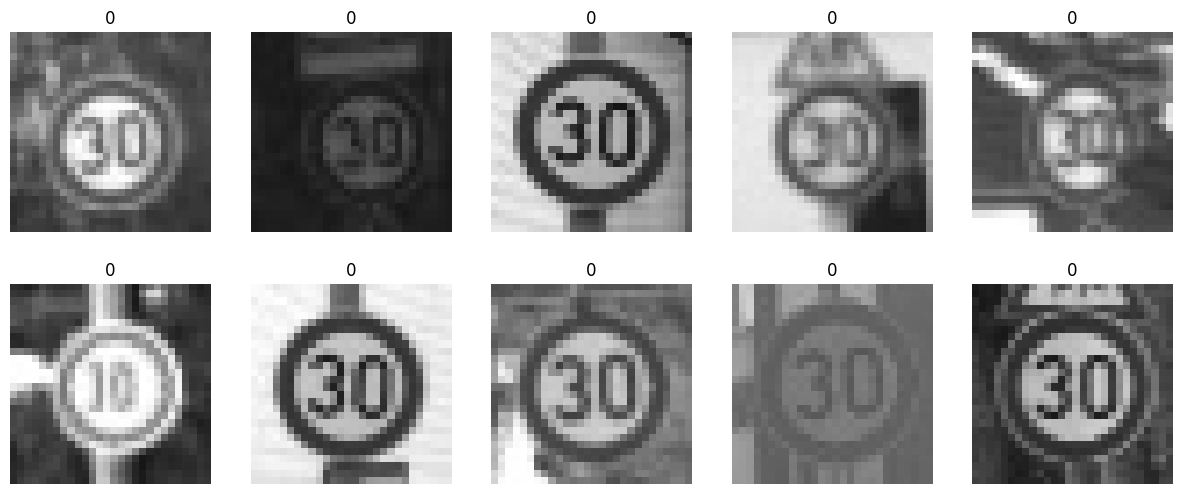

In [2]:
folder = 'data/subset_homework'
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

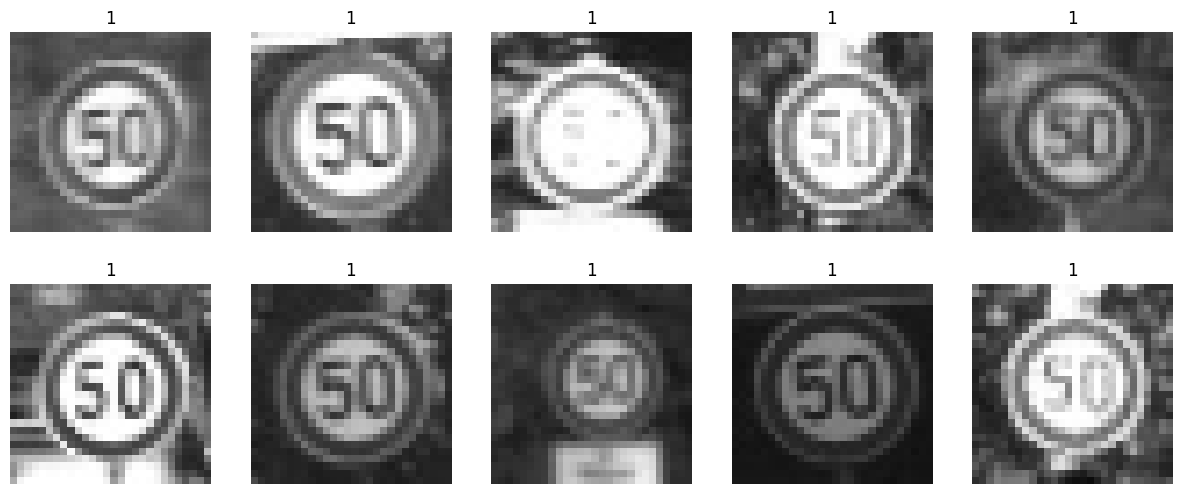

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [5]:
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)
pixels = np.array([image.flatten() for image in images])/255

print('Images', images.shape)
print('Labels', labels.shape)
print('Shape', pixels.shape)

Images (4470, 28, 28)
Labels (4470,)
Shape (4470, 784)


### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?


In [6]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

2024-12-02 23:46:31.452955: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 23:46:31.453544: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 23:46:31.455756: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 23:46:31.460813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733175991.470498  145306 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733175991.47

In [13]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

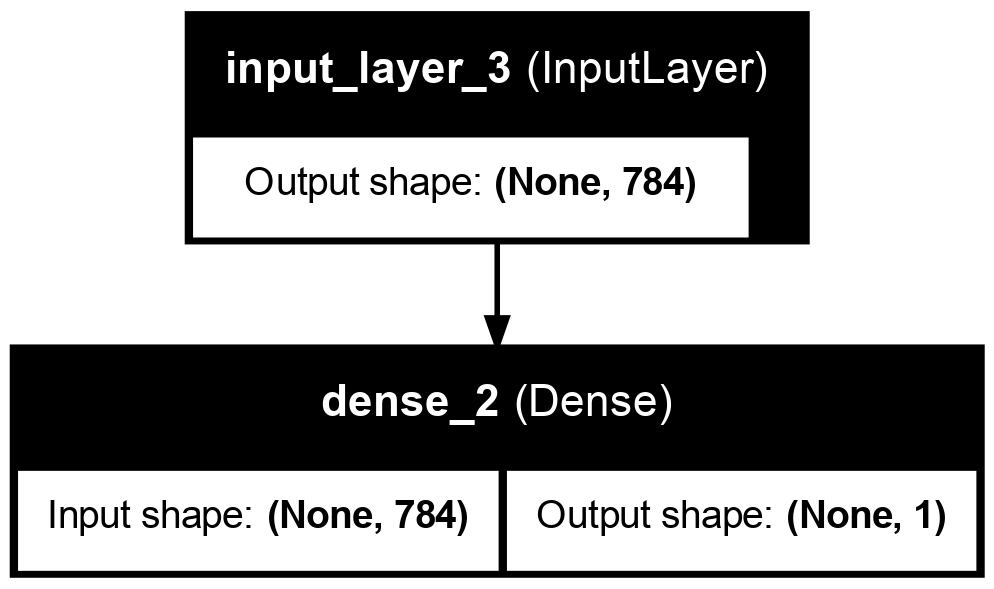

In [14]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [15]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [16]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.3567
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.2350
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.1935
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.1645
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.1413
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1281
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.1161
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.1092
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1009
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0993


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

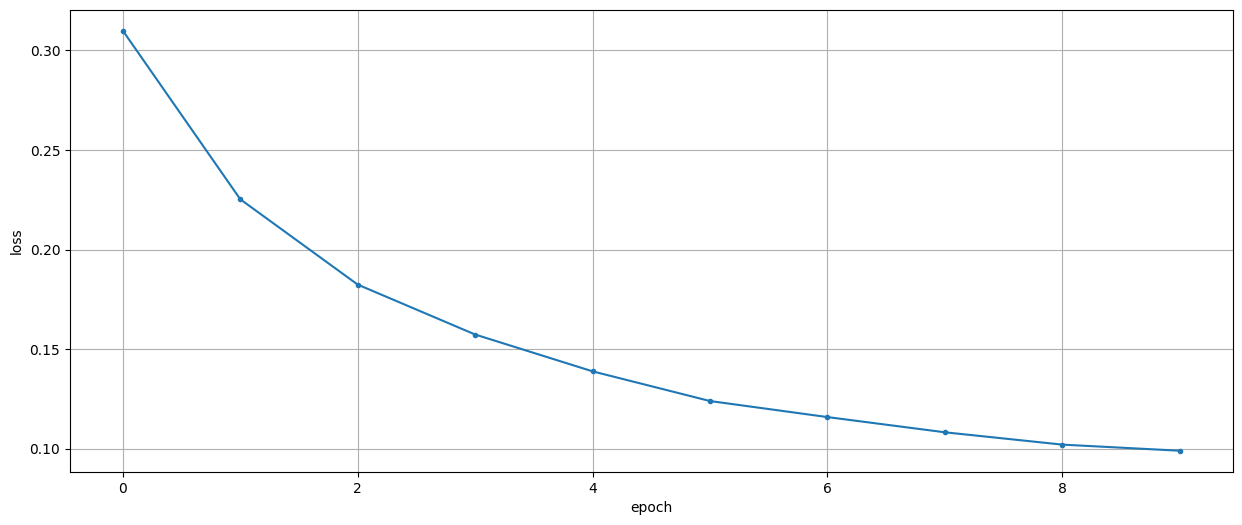

In [18]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.41596875] [0.41596875]


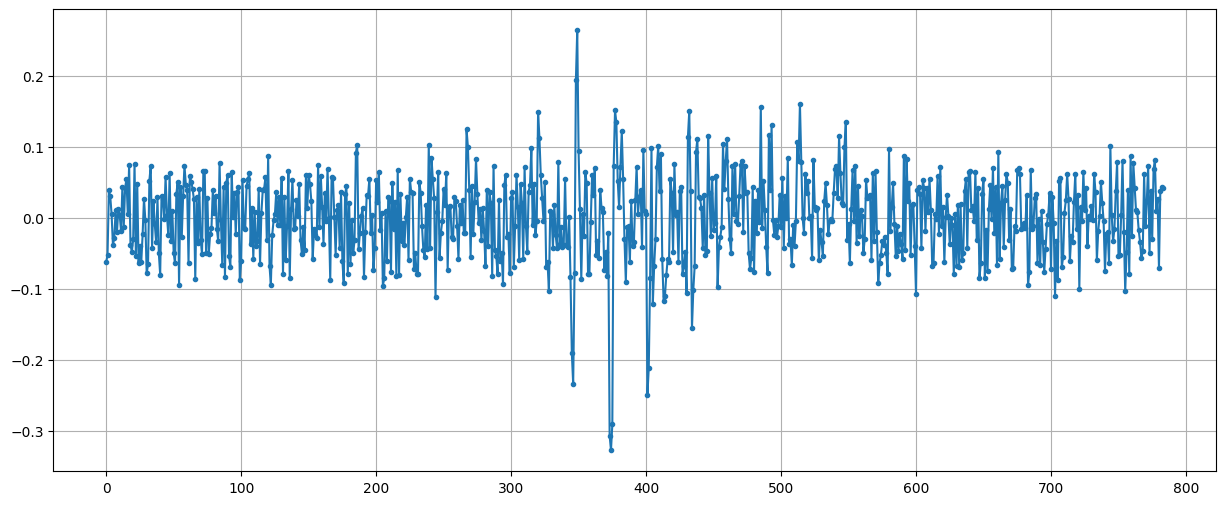

In [19]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [20]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.66160756]] 1


In [21]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


In [22]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9201342281879195


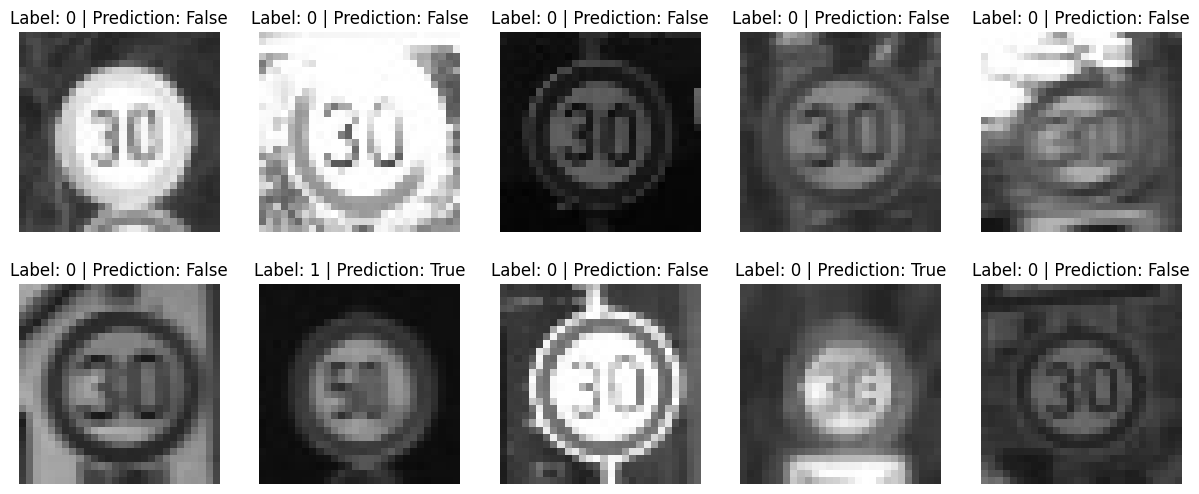

In [23]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?


In [40]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(15, activation="relu")(inputs)
outputs = Dense(20, activation="relu")(outputs)
outputs = Dense(1, activation="linear")(outputs)
model = Model(inputs, outputs)

model.summary()
model.compile(optimizer ='adam', loss = 'mean_squared_error')

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 15)             │        11,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,116 (47.33 KB)

 Trainable params: 12,116 (47.33 KB)

 Non-trainable params: 0 (0.00 B)

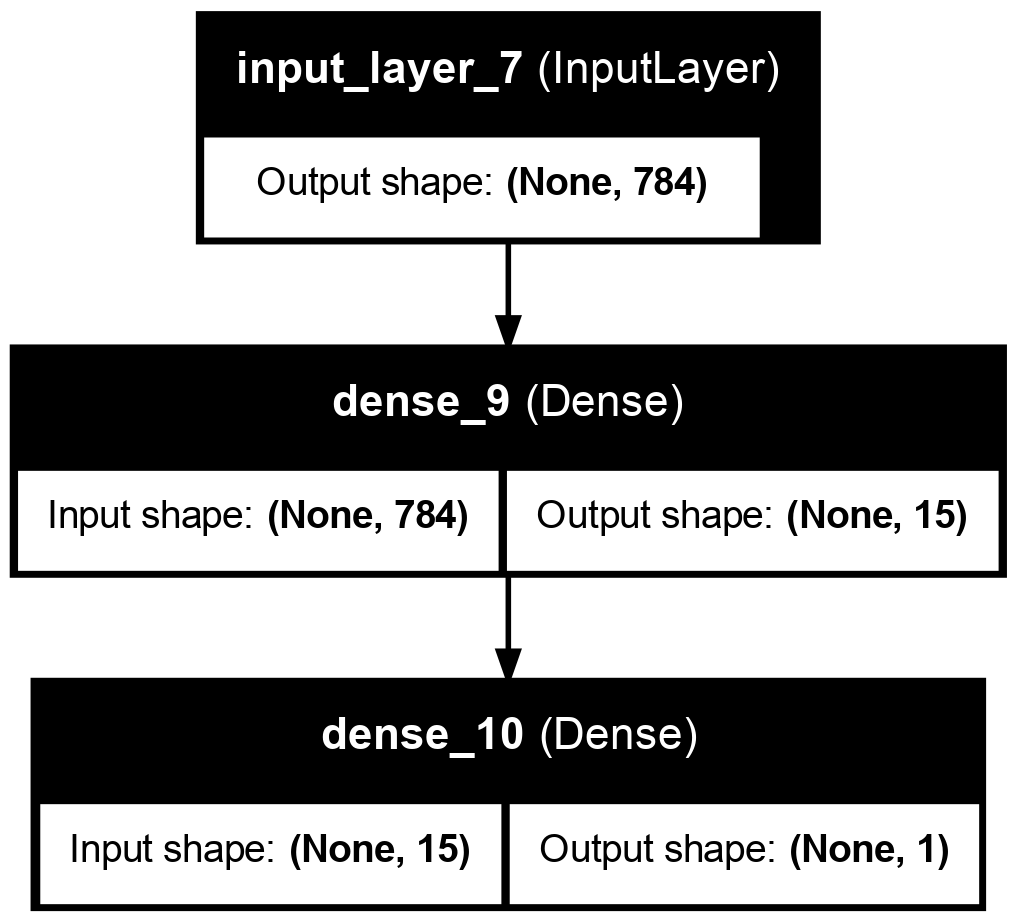

In [37]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [41]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.3295
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.2136
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.1591
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.1129
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.1029
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0826
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.0758
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0958
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0649
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0649


In [43]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.8521266]] 1


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

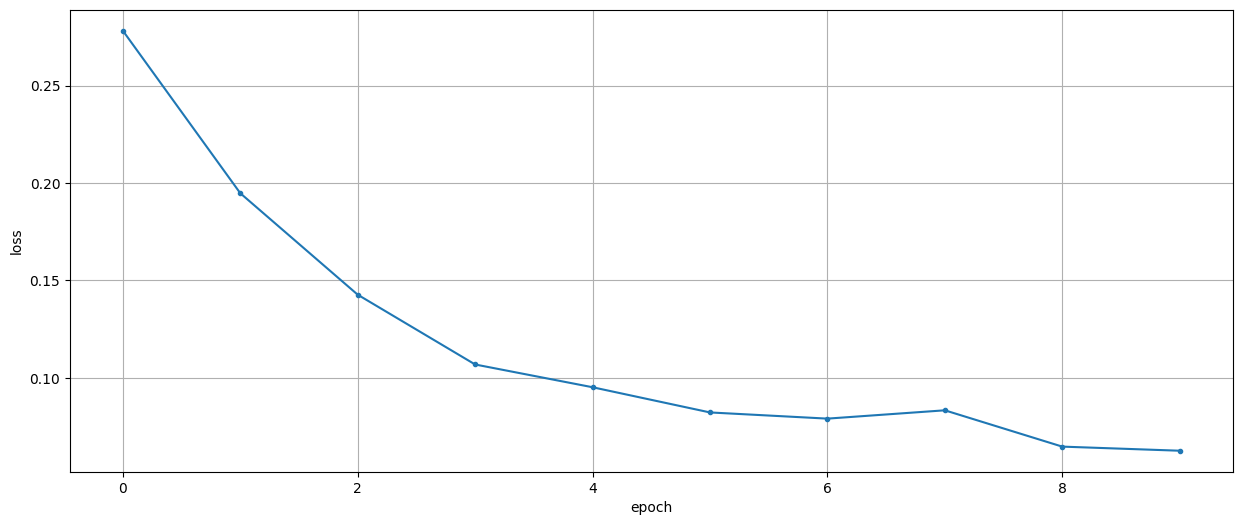

In [44]:
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [45]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct / len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
Accuracy 0.9539149888143177


### Вывод
Вторая модель, имеющая более сложную архитектуру с несколькими слоями и нелинейными активациями, демонстрирует лучшую точность (0.9539 против 0.9201). При этом первая модель с одним нейроном (и линейной активацией) достигает достаточно высокой точности - 0,92, тоесть данная задача не требует сложной архитекруры. Однако, если задача будет более сложна, то глубокая модель с несколькими слоями будет более подходящей. 